# K-Mode Clustering on Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In [25]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

In [4]:
bank = pd.read_csv('bankmarketing.csv')

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [8]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [9]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8240\3061569393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],


In [10]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [11]:
bank_cust  = bank_cust.drop('age',axis = 1)

In [12]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [13]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [18]:
# Checking the count per category
job_df = pd.DataFrame(bank_cust['job'].value_counts())
job_df

,count
job,
0,10422
1,9254
9,6743
7,3969
4,2924
5,1720
2,1456
6,1421
3,1060


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='job', ylabel='count'>

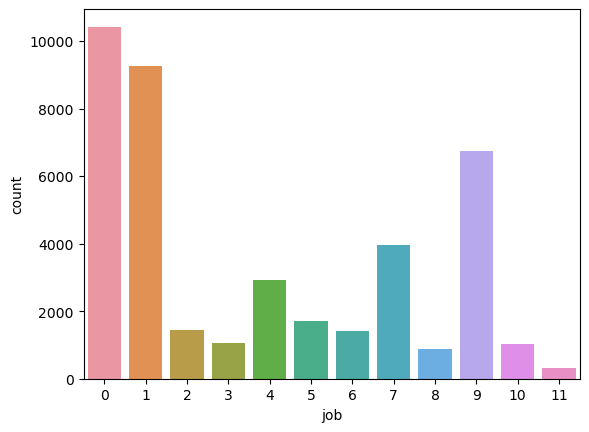

In [19]:
sns.barplot(x=job_df.index, y=job_df['count'])

In [22]:
# Checking the count per category
age_df = pd.DataFrame(bank_cust['age_bin'].value_counts())
age_df

,count
age_bin,
2,16385
3,10240
1,7243
4,6270
5,488
6,303
0,140
7,109
8,10


C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age_bin', ylabel='count'>

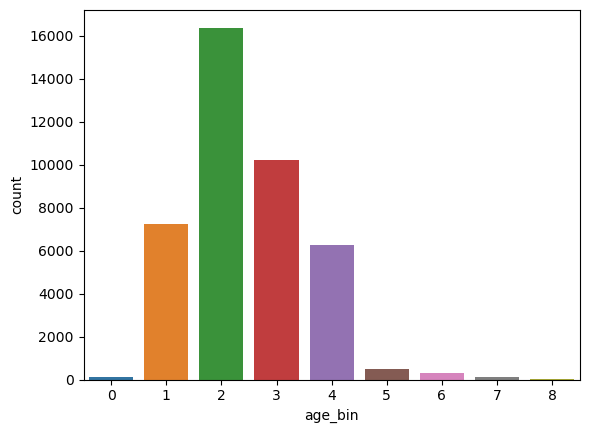

In [23]:
sns.barplot(x=age_df.index, y=age_df['count'])

## Using K-Mode with "Cao" initialization

In [26]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [27]:
# Predicted Clusters
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [28]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [29]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


## Using K-Mode with "Huang" initialization

In [30]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7111, cost: 199105.0


In [31]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

## Choosing K by comparing Cost against each K

In [32]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


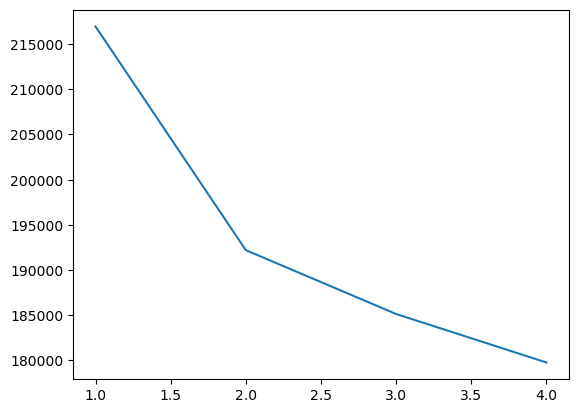

In [33]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [34]:
## Choosing K=2

In [35]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [36]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [37]:
bank_cust = bank_cust.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [38]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,3,1,0,0,0,0,1,6,1,1,4,1
1,7,1,3,1,0,0,1,6,1,1,4,1
2,7,1,3,0,2,0,1,6,1,1,2,0
3,0,1,1,0,0,0,1,6,1,1,2,0
4,7,1,3,0,0,2,1,6,1,1,4,1


In [39]:
# Data for Cluster1
cluster1 = combinedDf[combinedDf.cluster_predicted==1]

In [40]:
# Data for Cluster0
cluster0 = combinedDf[combinedDf.cluster_predicted==0]

In [41]:
cluster1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                12895 non-null  int32 
 1   marital            12895 non-null  int32 
 2   education          12895 non-null  int32 
 3   default            12895 non-null  int32 
 4   housing            12895 non-null  int32 
 5   loan               12895 non-null  int32 
 6   contact            12895 non-null  int32 
 7   month              12895 non-null  int32 
 8   day_of_week        12895 non-null  int32 
 9   poutcome           12895 non-null  int32 
 10  age_bin            12895 non-null  int32 
 11  cluster_predicted  12895 non-null  uint16
dtypes: int32(11), uint16(1)
memory usage: 680.0 KB


In [42]:
cluster0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                28293 non-null  int32 
 1   marital            28293 non-null  int32 
 2   education          28293 non-null  int32 
 3   default            28293 non-null  int32 
 4   housing            28293 non-null  int32 
 5   loan               28293 non-null  int32 
 6   contact            28293 non-null  int32 
 7   month              28293 non-null  int32 
 8   day_of_week        28293 non-null  int32 
 9   poutcome           28293 non-null  int32 
 10  age_bin            28293 non-null  int32 
 11  cluster_predicted  28293 non-null  uint16
dtypes: int32(11), uint16(1)
memory usage: 1.5 MB


In [43]:
# Checking the count per category for JOB
job1_df = pd.DataFrame(cluster1['job'].value_counts())
job0_df = pd.DataFrame(cluster0['job'].value_counts())

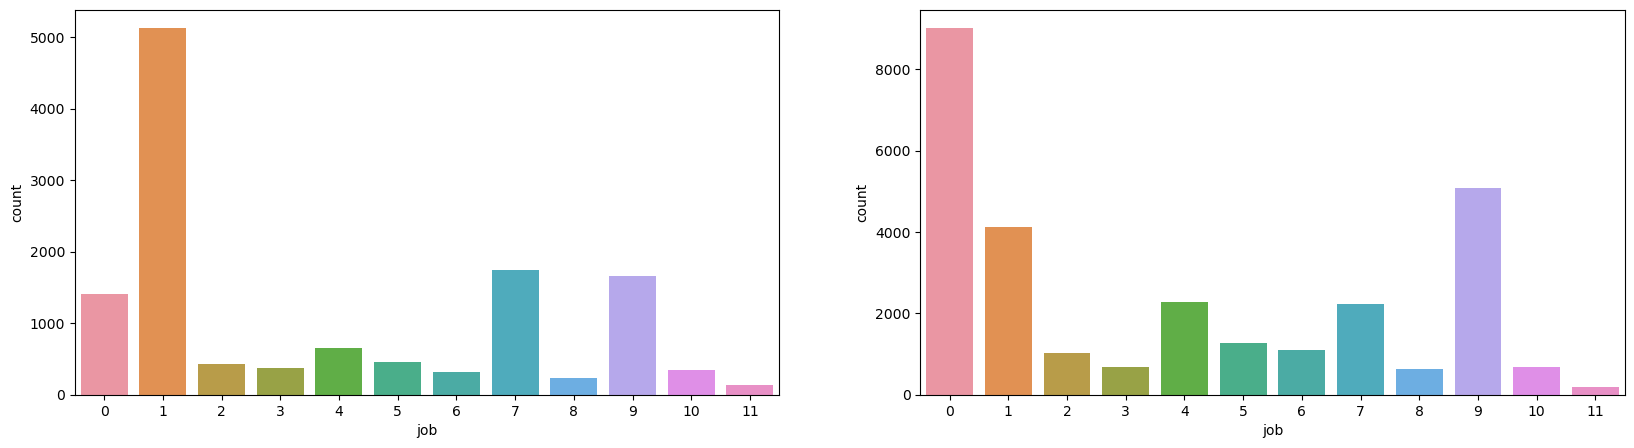

In [45]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=job1_df.index, y=job1_df['count'], ax=ax[0])
sns.barplot(x=job0_df.index, y=job0_df['count'], ax=ax[1])
fig.show()

In [46]:
age1_df = pd.DataFrame(cluster1['age_bin'].value_counts())
age0_df = pd.DataFrame(cluster0['age_bin'].value_counts())

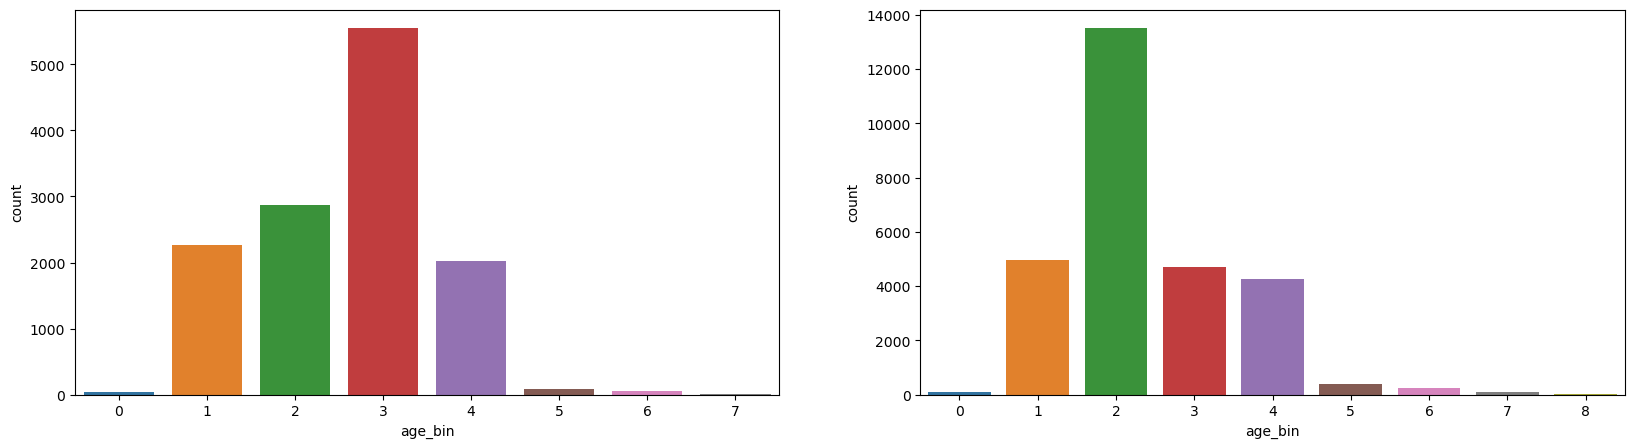

In [48]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age1_df.index, y=age1_df['count'], ax=ax[0])
sns.barplot(x=age0_df.index, y=age0_df['count'], ax=ax[1])
fig.show()

In [49]:
print(cluster1['marital'].value_counts())
print(cluster0['marital'].value_counts())

marital
1    8636
2    2732
0    1501
3      26
Name: count, dtype: int64
marital
1    16292
2     8836
0     3111
3       54
Name: count, dtype: int64


In [50]:
print(cluster1['education'].value_counts())
print(cluster0['education'].value_counts())

education
3    4186
2    2572
0    1981
5    1459
1    1033
6     977
7     680
4       7
Name: count, dtype: int64
education
6    11191
3     5329
5     3784
2     3473
0     2195
1     1259
7     1051
4       11
Name: count, dtype: int64
